<a href="https://colab.research.google.com/github/AthiFiz/deepLearning/blob/main/TransferLearning_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
!nvidia-smi

Mon Nov 20 08:09:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2023-11-20 08:09:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-20 08:09:25 (103 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-11-20 08:09:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 173.194.202.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   221MB/s    in 0.7s    

2023-11-20 08:09:39 (221 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [6]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [7]:
IMG_SIZE = (224,224)

train_data_10_percent = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                                    image_size=IMG_SIZE,
                                                                    label_mode="categorical")

test_data_10_percent = tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                                   image_size=IMG_SIZE,
                                                                   label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [9]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [11]:
for image, label in train_data_10_percent.take(-1):
  print(image, label)

Streaming output truncated to the last 5000 lines.
   [1.17652855e+01 1.17652855e+01 3.57652855e+01]
   [1.48571777e+01 1.48571777e+01 3.88571777e+01]
   [1.16429138e+01 1.20714417e+01 3.58571777e+01]]

  [[9.95714188e+01 6.75714188e+01 5.32346725e+01]
   [9.79948807e+01 6.59234543e+01 5.50663109e+01]
   [1.00428543e+02 6.58571167e+01 5.92142601e+01]
   ...
   [1.56836758e+01 1.41122646e+01 3.81122627e+01]
   [1.29387312e+01 1.29387312e+01 3.69387321e+01]
   [1.13520432e+01 1.13520432e+01 3.53520432e+01]]

  [[9.79285355e+01 6.59285355e+01 5.09285355e+01]
   [9.46173096e+01 6.25458794e+01 5.16887398e+01]
   [9.53519974e+01 6.23519974e+01 5.49234276e+01]
   ...
   [1.91428223e+01 1.71428223e+01 4.11428223e+01]
   [1.10253839e+01 9.02538395e+00 3.30253830e+01]
   [1.18010235e+01 1.18010235e+01 3.58010254e+01]]]


 [[[1.38000000e+02 1.01000000e+02 3.10000000e+01]
   [1.40285721e+02 1.03285713e+02 3.23316345e+01]
   [1.40142868e+02 1.02142853e+02 2.91428566e+01]
   ...
   [2.75051155e+01 8

In [10]:
!pip install neptune-client
import neptune.new as neptune

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.6/473.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 101.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/neptune/internal/backends/hosted_client.py:51: NeptuneDeprecationWarning: The 'neptune-client' package has been deprecated and will be removed in the future. Install the 'neptune' package instead. For more, see https://docs.neptune.ai/setup/upgrading/
  from neptune.version import version as neptune_client_version
<ipython-input-10-ea47c751fa38>:2: NeptuneDeprecationWarning: You're importing the Neptune client library via the deprecated `neptune.new` module, which will be removed in a future release. Import directly from `neptune` instead.
  import neptune.new as neptune


In [11]:
class NeptuneCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        run["training/accuracy"].log(logs.get("accuracy"), step=epoch)
        run["training/loss"].log(logs.get("loss"), step=epoch)
        run["validation/val_accuracy"].log(logs.get("val_accuracy"), step=epoch)
        run["validation/val_loss"].log(logs.get("val_loss"), step=epoch)

In [12]:
run = neptune.init_run(
    project="athif.ai/TransferLearning",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI1MWM3MTc4ZC04NTMxLTRiMzItODY4Ny1mNDkxY2RmYTFiOTUifQ==")

run['sys/tags'].add("model_0")

params={"lr":0.001, "batch_size":32}
run["parameters"] = params

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

x = base_model(inputs)
print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="gloabal_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data = test_data_10_percent,
                                 validation_steps=int(0.25*len(test_data_10_percent)),
                                 callbacks=[NeptuneCallback()])

run.stop()

<ipython-input-12-d318e66910ff>:1: NeptuneWarning: The following monitoring options are disabled by default in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', and 'capture_hardware_metrics'. To enable them, set each parameter to 'True' when initializing the run. The monitoring will continue until you call run.stop() or the kernel stops. Also note: Your source files can only be tracked if you pass the path(s) to the 'source_code' argument. For help, see the Neptune docs: https://docs.neptune.ai/logging/source_code/
  run = neptune.init_run(


https://app.neptune.ai/athif.ai/TransferLearning/e/TRAN-9
24274472/24274472 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
Epoch 1/5
24/24 [==============================] - 24s 301ms/step - loss: 1.9246 - accuracy: 0.3760 - val_loss: 1.3474 - val_accuracy: 0.7220
Epoch 2/5
24/24 [==============================] - 5s 188ms/step - loss: 1.1624 - accuracy: 0.7347 - val_loss: 0.9148 - val_accuracy: 0.8141
Epoch 3/5
24/24 [==============================] - 8s 316ms/step - loss: 0.8512 - accuracy: 0.8093 - val_loss: 0.7182 - val_accuracy: 0.8602
Epoch 4/5
24/24 [==============================] - 4s 126ms/step - loss: 0.6934 - accuracy: 0.8547 - val_loss: 0.6238 - val_accuracy: 0.8651
Epoch 5/5
24/24 [==============================] - 3s 128ms/step - loss: 0.5944 - accuracy: 0.8693 - val_loss: 0.5551 - val_accuracy: 0.8783
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 4 operations to synchronize with Neptune.

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

In [ ]:
base_model.summary()

In [15]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 gloabal_average_pooling_la  (None, 1280)              0         
 yer (GlobalAveragePooling2                                      
 D)                                                              
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
__________________

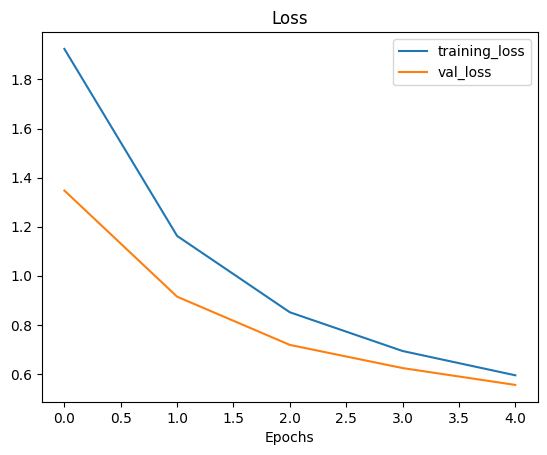

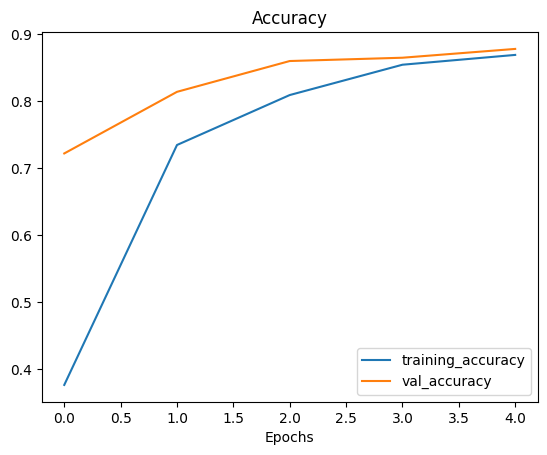

In [16]:
plot_loss_curves(history_10_percent)

In [17]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2023-11-20 08:13:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 142.250.107.207, 173.194.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   241MB/s    in 0.5s    

2023-11-20 08:13:39 (241 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
walk_through_dir("10_food_classes_1_percent")

In [19]:
IMG_SIZE = (224,224)
train_data_1_percent = tf.keras.utils.image_dataset_from_directory(train_dir_1_percent,
                                                                   label_mode="categorical",
                                                                   image_size=IMG_SIZE)
test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [20]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
],  name="data_augmentation")

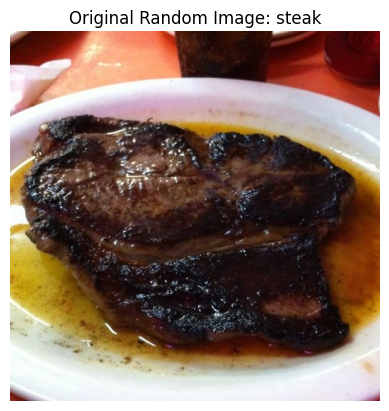

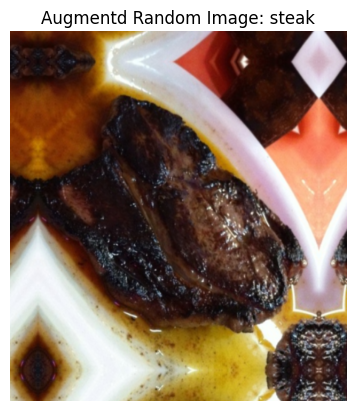

In [21]:
import matplotlib.pyplot as plt
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" +  target_class

random_image = random.choice(os.listdir(target_dir))
random_img_path = target_dir+ "/" + random_image

img = plt.imread(random_img_path)
plt.imshow(img)
plt.axis("off")
plt.title(f"Original Random Image: {target_class}");

augmented_img = data_augmentation(img)
plt.figure()
plt.imshow(augmented_img/255)
plt.axis("off")
plt.title(f"Augmentd Random Image: {target_class}");

In [23]:
input_shape = (224,224,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False

inputs = layers.Input(shape=input_shape, name="input_layer")

x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="polling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1_percent = model_1.fit(train_data_1_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_1_percent),
                                validation_data=test_data,
                                validation_steps=int(0.25* len(test_data)))

Epoch 1/5
3/3 [==============================] - 16s 3s/step - loss: 2.3704 - accuracy: 0.1000 - val_loss: 2.2377 - val_accuracy: 0.1595
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1399 - accuracy: 0.2286 - val_loss: 2.1184 - val_accuracy: 0.2484
Epoch 3/5
3/3 [==============================] - 4s 1s/step - loss: 1.9923 - accuracy: 0.3000 - val_loss: 2.0182 - val_accuracy: 0.3322
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.8323 - accuracy: 0.3857 - val_loss: 1.9293 - val_accuracy: 0.3914
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 1.7419 - accuracy: 0.5571 - val_loss: 1.8539 - val_accuracy: 0.4309


In [24]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, 3)           0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 polling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [25]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 6s 68ms/step - loss: 1.8392 - accuracy: 0.4180


[1.8392345905303955, 0.4180000126361847]

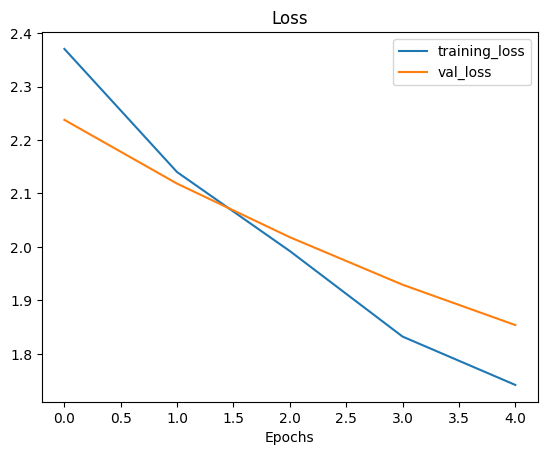

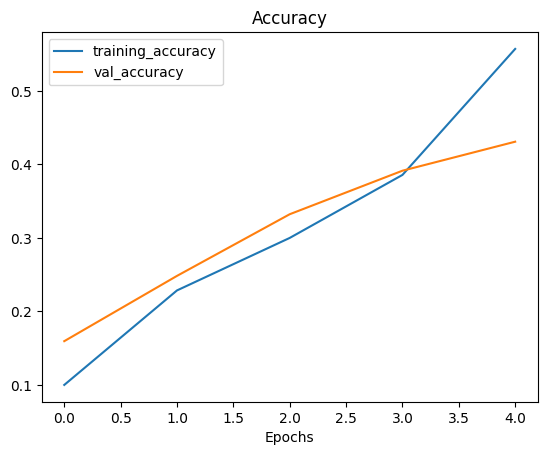

In [26]:
plot_loss_curves(history_1_percent)

In [27]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

--2023-11-20 08:19:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 74.125.142.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   235MB/s    in 0.7s    

2023-11-20 08:19:51 (235 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [28]:
train_data_10_percent = tf.keras.utils.image_dataset_from_directory(train_dir_10_percent,
                                                                    label_mode="categorical",
                                                                    image_size=IMG_SIZE)

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name = "data_augmentation")

input_shape = (224,224,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False

inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [34]:
def create_base_model(input_shape: tuple[int, int, int] = (224,224,3),
                      output_shape: int = 10,
                      training: bool = False,
                      learning_rate: float = 0.001):


  base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
  base_model.trainable = training

  inputs = layers.Input(shape=input_shape, name="input_layer")
  x = data_augmentation(inputs)
  x = base_model(x, training=False)
  x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
  outputs = layers.Dense(units=output_shape, activation="softmax", name="output_layer")(x)
  model = tf.keras.Model(inputs, outputs)

  model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                metrics=["accuracy"])

  return model

In [35]:
model_2 = create_base_model()

In [36]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_nest_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

In [37]:
initial_epochs= 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25*len(test_data)),
                                          callbacks=[checkpoint_callback])

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0913 - accuracy: 0.2733
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint
24/24 [==============================] - 28s 786ms/step - loss: 2.0913 - accuracy: 0.2733 - val_loss: 1.5568 - val_accuracy: 0.5888
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4560 - accuracy: 0.6413
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint
24/24 [==============================] - 15s 594ms/step - loss: 1.4560 - accuracy: 0.6413 - val_loss: 1.0931 - val_accuracy: 0.7484
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1373 - accuracy: 0.7067
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint
24/24 [==============================] - 13s 529ms/step - loss: 1.1373 - accuracy: 0.7067 - val_loss: 0.8563 - val_accuracy: 0.8059
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.9540 - accuracy: 0.7707
Epoch 4: s

In [38]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 7s 81ms/step - loss: 0.6768 - accuracy: 0.8144


[0.6767932772636414, 0.8144000172615051]

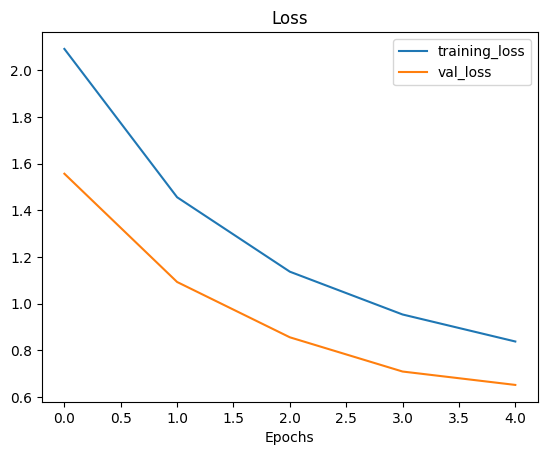

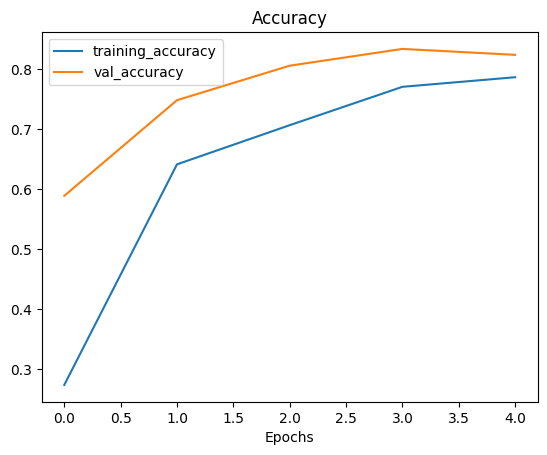

In [39]:
plot_loss_curves(history_10_percent_data_aug)

In [40]:
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 5s 62ms/step - loss: 0.6768 - accuracy: 0.8144


In [41]:
results_10_percent_data_aug == loaded_weights_model_results

False

In [42]:
import numpy as np
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

In [43]:
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[1.78813934e-07 0.00000000e+00]


In [44]:
model_2.layers

In [46]:
model_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [47]:
model_2_base_model = model_2.layers[2]
len(model_2_base_model.trainable_variables)

0

In [49]:
for no, layer in enumerate(model_2.layers):
  print(f"{no+1} - {layer.name} --> {layer.trainable}")

1 - input_layer --> True
2 - data_augmentation --> True
3 - efficientnetv2-b0 --> False
4 - pooling_layer --> True
5 - output_layer --> True


In [ ]:
for no, layer in enumerate(model_2_base_model.layers):
  print(f"{no+1} - {layer.name} --> {layer.trainable}")

In [74]:
model_2_base_model.trainable = True
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
for no, layer in enumerate(model_2_base_model.layers):
  print(f"{no+1} - {layer.name} --> {layer.trainable}")

In [76]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [77]:
for no, layer in enumerate(model_2.layers):
  print(f"{no+1} - {layer.name} --> {layer.trainable}")

1 - input_layer --> True
2 - data_augmentation --> True
3 - efficientnetv2-b0 --> True
4 - pooling_layer --> True
5 - output_layer --> True


In [78]:
len(model_2_base_model.trainable_variables)

10

In [79]:
print(len(model_2.trainable_variables))

12


In [81]:
history_10_percent_data_aug.epoch

[0, 1, 2, 3, 4]

In [103]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1]+1,
                                               validation_steps=int(0.25*len(test_data)))

Epoch 6/10
24/24 [==============================] - 12s 497ms/step - loss: 0.4294 - accuracy: 0.8627 - val_loss: 0.4256 - val_accuracy: 0.8536
Epoch 7/10
24/24 [==============================] - 9s 347ms/step - loss: 0.4136 - accuracy: 0.8653 - val_loss: 0.3971 - val_accuracy: 0.8717
Epoch 8/10
24/24 [==============================] - 14s 472ms/step - loss: 0.3971 - accuracy: 0.8973 - val_loss: 0.4131 - val_accuracy: 0.8553
Epoch 9/10
24/24 [==============================] - 10s 412ms/step - loss: 0.3535 - accuracy: 0.8893 - val_loss: 0.3972 - val_accuracy: 0.8766
Epoch 10/10
24/24 [==============================] - 12s 480ms/step - loss: 0.3446 - accuracy: 0.8960 - val_loss: 0.3962 - val_accuracy: 0.8684


In [104]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 5s 63ms/step - loss: 0.4386 - accuracy: 0.8532


In [105]:
acc = history_10_percent_data_aug.history["accuracy"]
acc

[0.273333340883255,
 0.6413333415985107,
 0.7066666483879089,
 0.7706666588783264,
 0.7866666913032532]

In [106]:
acc2 = history_fine_10_percent_data_aug.history["accuracy"]
acc2

[0.862666666507721,
 0.8653333187103271,
 0.8973333239555359,
 0.8893333077430725,
 0.8960000276565552]

In [107]:
acc + acc2

[0.273333340883255,
 0.6413333415985107,
 0.7066666483879089,
 0.7706666588783264,
 0.7866666913032532,
 0.862666666507721,
 0.8653333187103271,
 0.8973333239555359,
 0.8893333077430725,
 0.8960000276565552]

In [108]:
def compare_history(original_history, new_history, initial_epochs=5):

  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]
  print(len(acc))

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  print(len(total_acc))
  print(total_acc)

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Validation_accuracy")
  plt.plot([initial_epochs, initial_epochs],
           plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Trinaing and Validation Accuracy")

  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(total_val_loss, label='Validation Loss')
  plt.plot([initial_epochs, initial_epochs],
            plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

5
10
[0.273333340883255, 0.6413333415985107, 0.7066666483879089, 0.7706666588783264, 0.7866666913032532, 0.862666666507721, 0.8653333187103271, 0.8973333239555359, 0.8893333077430725, 0.8960000276565552]


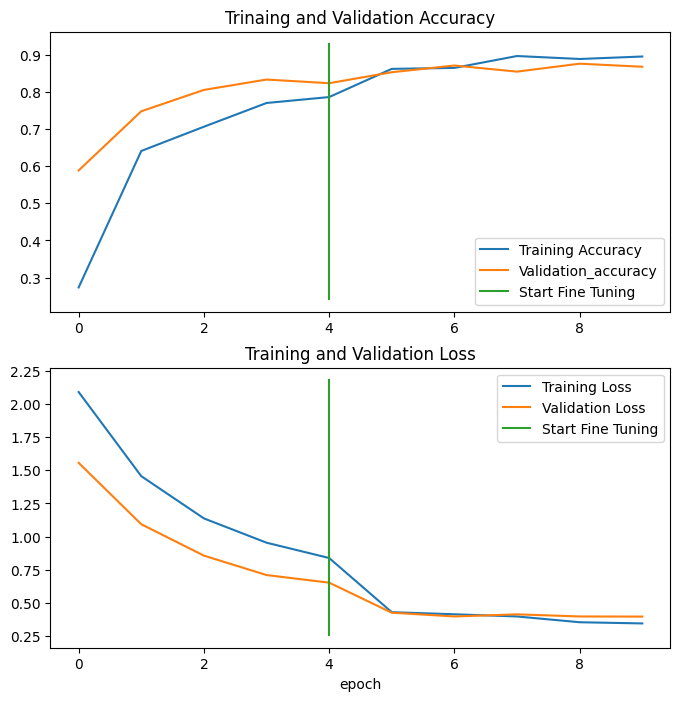

In [109]:
compare_history(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_percent_data_aug,
                 initial_epochs=5)